In [10]:
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.vgg16 import VGG16

In [11]:
train_diseased_dir='C:\\Users\\Dell\\Desktop\\Tensoflow\\Untitled Folder\\output\\train\\Parasitized'
train_notdiseased_dir='C:\\Users\\Dell\\Desktop\\Tensoflow\\Untitled Folder\\output\\train\\Uninfected'

validation_diseased_dir='C:/Users/Dell/Desktop/Tensoflow/Untitled Folder/output/test/Parasitized'
validation_notdiseased_dir='C:\\Users\\Dell\\Desktop\\Tensoflow\\Untitled Folder\\output\\test\\Uninfected'

train_diseased_name=os.listdir(train_diseased_dir)
train_notdiseased_name=os.listdir(train_notdiseased_dir)

validation_diseased_name=os.listdir(validation_diseased_dir)
validation_notdiseased_name=os.listdir(validation_notdiseased_dir)

In [12]:
print('total training diseased images :', len(os.listdir(      train_diseased_dir ) ))
print('total training non diseased images :', len(os.listdir(      train_notdiseased_dir ) ))

print('total validation diseased images :', len(os.listdir( validation_diseased_dir ) ))
print('total validation not diseased images :', len(os.listdir( validation_notdiseased_dir ) ))

total training diseased images : 11024
total training non diseased images : 11024
total validation diseased images : 1378
total validation not diseased images : 1378


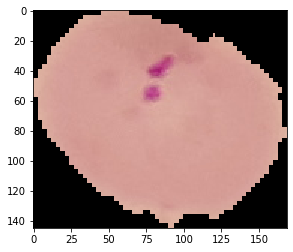

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path_diseased=os.path.join(train_diseased_dir,train_diseased_name[2])
img_path_not=os.path.join(train_notdiseased_dir,train_notdiseased_name[0])

img=mpimg.imread(img_path_diseased)
plt.imshow(img)

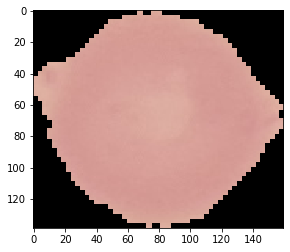

In [14]:
img=mpimg.imread(img_path_not)
plt.imshow(img)

<h2>Setting up the Transfer Learning model<h2>

In [18]:
!pip install split-folders 

In [ ]:
import splitfolders
splitfolders.ratio('C:/Users/Dell/Desktop/Tensoflow/Untitled Folder/cell_images', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [15]:
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
rescale=1.0/255.,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_datagen.flow_from_directory(
'C:\\Users\\Dell\\Desktop\\Tensoflow\\Untitled Folder\\output\\train\\',
 batch_size=30,
 class_mode='binary',
 target_size=(150,150))

validation_generator=test_datagen.flow_from_directory(
'C:\\Users\\Dell\\Desktop\\Tensoflow\\Untitled Folder\\output\\test\\',
batch_size=30,
class_mode='binary',
target_size=(150,150)
)


Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_generator, epochs=5, steps_per_epoch=22048//30, validation_data = validation_generator, verbose = 1, validation_steps=2756//30)

model.save("malaria.h5")

In [17]:
pre_trained_model=VGG16(input_shape=(150,150,3),
                              include_top=False,
                              weights='imagenet')

for layer in pre_trained_model.layers:
    layer.trainable=False

# pre_trained_model.summary()
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [32]:
from tensorflow.keras.optimizers import RMSprop
x = keras.layers.Flatten()(pre_trained_model.output)
x=layers.Dense(1024,activation='relu')(x)
#adding dropout
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model2=Model(pre_trained_model.input,x)

model2.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

print(model2.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [33]:
history = model2.fit_generator(train_generator, 
                               epochs=5, 
                               steps_per_epoch=22048//30, 
                               validation_data = validation_generator,
                               verbose = 1, 
                               validation_steps=2756//30)



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 734 steps, validate for 91 steps
Epoch 1/5
734/734 [==============================] - 4454s 6s/step - loss: 0.4120 - accuracy: 0.8192 - val_loss: 0.2774 - val_accuracy: 0.8762
Epoch 2/5
734/734 [==============================] - 3931s 5s/step - loss: 0.3279 - accuracy: 0.8626 - val_loss: 0.2267 - val_accuracy: 0.9249
Epoch 3/5
734/734 [==============================] - 3956s 5s/step - loss: 0.3040 - accuracy: 0.8785 - val_loss: 0.2224 - val_accuracy: 0.9209
Epoch 4/5
734/734 [==============================] - 3883s 5s/step - loss: 0.2995 - accuracy: 0.8795 - val_loss: 0.2218 - val_accuracy: 0.9033
Epoch 5/5
734/734 [==============================] - 3881s 5s/step - loss: 0.2903 - accuracy: 0.8868 - val_loss: 0.2033 - val_accuracy: 0.9209


NameError: name 'model' is not defined

In [34]:
model2.save("malaria_Transfer.h5") 

In [1]:
from tensorflow import keras
model = keras.models.load_model('malaria_Transfer.h5')

In [10]:
from keras.preprocessing import image 
import numpy as np

path='C:/Users/Dell/Desktop/Flask_Malaria/uploads/infec.png'
img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images)
  
print(classes[0])
  
if classes[0]>0:
    print(" is not infected infected")
else:
    print(" is a infected")

[0.]
 is a infected
